In [5]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [6]:
all_tweets = pd.read_csv(r'C:\Users\nkman\OneDrive\Desktop\Final_year_project/stock_tweets.csv')

In [7]:
all_tweets.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [8]:
print(all_tweets.shape)
all_tweets['Stock Name'].unique()

(80793, 4)


array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [9]:
df = all_tweets #[all_tweets['Stock Name'].isin(stock_names)]
print(df.shape)
df.head()

(80793, 4)


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [10]:
df['Stock Name'].value_counts()

Stock Name
TSLA    37422
TSM     11034
AAPL     5056
AMZN     4089
MSFT     4089
PG       4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
F          31
NOC        31
Name: count, dtype: int64

In [11]:
sent_df = df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,


In [12]:
sent_df.T

,0,1,2,3,4,5,6,7,8,9,...,80783,80784,80785,80786,80787,80788,80789,80790,80791,80792
Date,2022-09-29 23:41:16+00:00,2022-09-29 23:24:43+00:00,2022-09-29 23:18:08+00:00,2022-09-29 22:40:07+00:00,2022-09-29 22:27:05+00:00,2022-09-29 22:25:53+00:00,2022-09-29 22:24:22+00:00,2022-09-29 22:23:54+00:00,2022-09-29 22:23:28+00:00,2022-09-29 22:15:01+00:00,...,2021-10-14 05:45:14+00:00,2021-10-13 16:47:19+00:00,2021-10-12 00:49:51+00:00,2021-10-11 03:51:36+00:00,2021-10-09 00:18:25+00:00,2021-10-07 17:11:57+00:00,2021-10-04 17:05:59+00:00,2021-10-01 04:43:41+00:00,2021-10-01 00:03:32+00:00,2021-09-30 10:22:52+00:00
Tweet,Mainstream media has done an amazing job at br...,Tesla delivery estimates are at around 364k fr...,3/ Even if I include 63.0M unvested RSUs as of...,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,"@RealDanODowd @Tesla Stop trying to kill kids,...",@RealDanODowd @Tesla This is you https://t.co/...,For years @WholeMarsBlog viciously silenced @T...,$NIO just because I'm down money doesn't mean ...,50 likes for some $SPY $TSLA charts to study!\...,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,...,🐳 🚨Whale Watchlist🚨🐳\n\n🌊@SharkofTraders Follo...,XPeng P7 tops Sept sales among new EV makers i...,Glocks Watch (1/2)\n\n$F 15.5c &gt; 15.36 | 14...,"NIO reached 100,000 vehicle rolled off the pro...","Update on Apple, Tesla, Nio, $QQQ, $SPY, ROKU,...",Some of the fastest growing tech stocks on the...,"With earnings on the horizon, here is a quick ...",Our record delivery results are a testimony of...,"We delivered 10,412 Smart EVs in Sep 2021, rea...",Why can XPeng P5 deliver outstanding performan...
Stock Name,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,...,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV
Company Name,"Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.",...,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.
sentiment_score,,,,,,,,,,,...,,,,,,,,,,
Negative,,,,,,,,,,,...,,,,,,,,,,
Neutral,,,,,,,,,,,...,,,,,,,,,,
Positive,,,,,,,,,,,...,,,,,,,,,,


In [13]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df.T.items():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i) # calculate the sentiment scores 0 to 1 and centre is 0.5. 0 is negative 0.5 is neural 1 is possible
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df.loc[indexx, 'Tweet'])
        print (indx)
        break

CPU times: total: 56.8 s
Wall time: 59.3 s


In [14]:
print(sent_df.head())

                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  \
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.   
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.   
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.   
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.   

  sentiment_score Negative Neutral Positive  
0          0.0772    0.127   0.758    0.115  
1             0.0      0.0     1.0      0.0  
2           0.296      0.0   0.951    0.049  
3         -0.7568    0.273    0.59    0.137  
4          -0.875    0.526   0.474      0.0  


The US Stock market is open from 5:30 a.m. to 12.30 p.m. EST, sentiment_during_trading_hrs, sentiment_after_trading_hrs

In [15]:
#sent_df['Date'] = pd.to_datetime(sent_df['Date'])
#sent_df['Date'] = sent_df['Date'].dt.date
sent_df = sent_df.drop(columns=['Company Name'])

In [16]:
sent_df.head()
sent_df.shape


(80793, 7)

In [17]:
def filter_time_range(df, start_time, end_time):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = df['Date'].dt.time
    df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str)
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Define the time ranges in EST
start_time_est = pd.Timestamp('05:30:00').time()
end_time_est = pd.Timestamp('12:30:00').time()

# Filter DataFrame for two different time ranges
df_within_time_range = filter_time_range(sent_df, start_time_est, end_time_est)
df_outside_time_range = sent_df[~sent_df.index.isin(df_within_time_range.index)]

df_within_time_range['Date'] = pd.to_datetime(df_within_time_range['Date'])
df_within_time_range['Date'] = df_within_time_range['Date'].dt.date

df_outside_time_range['Date'] = pd.to_datetime(df_outside_time_range['Date'])
df_outside_time_range['Date'] = df_outside_time_range['Date'].dt.date

# Aggregate sentiment scores for both time ranges
result_within_time_range = df_within_time_range.groupby(['Stock Name', 'Date']).agg({'sentiment_score': ['mean', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]}).reset_index()
result_within_time_range.columns = ['Stock Name', 'Date', 'Mean', 'Min', 'Max', '25th Percentile', '75th Percentile']

result_outside_time_range = df_outside_time_range.groupby(['Stock Name', 'Date']).agg({'sentiment_score': ['mean', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]}).reset_index()
result_outside_time_range.columns = ['Stock Name', 'Date', 'Mean', 'Min', 'Max', '25th Percentile', '75th Percentile']

print("Results for time range between 5:30 AM EST to 12:30 PM EST:")
print(result_within_time_range)

print("\nResults for time range outside 5:30 AM EST to 12:30 PM EST:")
print(result_outside_time_range)

Results for time range between 5:30 AM EST to 12:30 PM EST:
     Stock Name        Date    Mean     Min     Max  25th Percentile  \
0          AAPL  2021-09-30  0.2739  0.2296  0.3182          0.25175   
1          AAPL  2021-10-07  0.1484     0.0   0.368          0.03860   
2          AAPL  2021-10-08  0.7842  0.7778  0.7906          0.78100   
3          AAPL  2021-10-10  0.3612  0.3612  0.3612          0.36120   
4          AAPL  2021-10-13 -0.4278 -0.4278 -0.4278         -0.42780   
...         ...         ...     ...     ...     ...              ...   
2503         ZS  2022-08-30     0.0     0.0     0.0          0.00000   
2504         ZS  2022-09-01  0.7351  0.7351  0.7351          0.73510   
2505         ZS  2022-09-17  0.8271  0.8271  0.8271          0.82710   
2506         ZS  2022-09-21  0.5122  0.5122  0.5122          0.51220   
2507         ZS  2022-09-29     0.0     0.0     0.0          0.00000   

      75th Percentile  
0             0.29605  
1             0.22260  
2  

In [18]:
print(result_within_time_range.shape)
print(result_outside_time_range.shape)

(2508, 7)
(5742, 7)


In [1]:
# Merge results on 'Stock Name' and 'Date'
merged_result = pd.merge(result_within_time_range, result_outside_time_range, on=['Stock Name', 'Date'], suffixes=('_sentiment_intraday', '_outside'))

print(merged_result)



KeyboardInterrupt



In [20]:
merged_result.columns

Index(['Stock Name', 'Date', 'Mean_sentiment_intraday',
       'Min_sentiment_intraday', 'Max_sentiment_intraday',
       '25th Percentile_sentiment_intraday',
       '75th Percentile_sentiment_intraday', 'Mean_outside', 'Min_outside',
       'Max_outside', '25th Percentile_outside', '75th Percentile_outside'],
      dtype='object')

In [21]:
merged_result['Mean_sentiment_before_sod']=merged_result['Mean_outside'].shift(-1) # return a day before the news
merged_result['Min_sentiment_before_sod']=merged_result['Min_outside'].shift(-1)
merged_result['Max_sentiment_before_sod']=merged_result['Max_outside'].shift(-1)
merged_result['25th Percentile_sentiment_before_sod']=merged_result['25th Percentile_outside'].shift(-1)
merged_result['75th Percentile_sentiment_before_sod']=merged_result['75th Percentile_outside'].shift(-1)
merged_result.reset_index(level=0, inplace=True)

In [22]:
tweet_ds = merged_result.drop(['25th Percentile_outside', '75th Percentile_outside', 'Mean_outside', 'Min_outside', 'Max_outside', '25th Percentile_sentiment_intraday', '75th Percentile_sentiment_intraday', '25th Percentile_sentiment_before_sod', '75th Percentile_sentiment_before_sod'], axis=1)

In [23]:
tweet_ds.head()

,index,Stock Name,Date,Mean_sentiment_intraday,Min_sentiment_intraday,Max_sentiment_intraday,Mean_sentiment_before_sod,Min_sentiment_before_sod,Max_sentiment_before_sod
0,0,AAPL,2021-09-30,0.2739,0.2296,0.3182,0.39536,0.0,0.6892
1,1,AAPL,2021-10-07,0.1484,0.0,0.368,0.32482,0.0,0.8538
2,2,AAPL,2021-10-08,0.7842,0.7778,0.7906,0.231475,-0.4215,0.8597
3,3,AAPL,2021-10-10,0.3612,0.3612,0.3612,-0.01315,-0.5859,0.2023
4,4,AAPL,2021-10-13,-0.4278,-0.4278,-0.4278,0.516231,0.0,0.893


Get final dataset for training

In [24]:
all_stocks = pd.read_csv(r'C:\Users\nkman\OneDrive\Desktop\Final_year_project\stock_yfinance_data.csv')
print(all_stocks.shape)
all_stocks.head()
all_stocks['Stock Name'].unique()
#AAPL	2021-10-03
#all_stocks = all_stocks[(all_stocks['Stock Name']=='AAPL') & (all_stocks['Date']=='2021-10-04')]

(6300, 8)


array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [25]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [26]:
stock_df = all_stocks#[all_stocks['Stock Name'].isin(stock_names)]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [27]:
stock_df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [28]:
stock_df.columns
stock_df['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [29]:
final_df = pd.merge(stock_df, tweet_ds, on=['Stock Name', 'Date'])
#final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)

(1743, 15)


In [30]:
final_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name', 'index', 'Mean_sentiment_intraday',
       'Min_sentiment_intraday', 'Max_sentiment_intraday',
       'Mean_sentiment_before_sod', 'Min_sentiment_before_sod',
       'Max_sentiment_before_sod'],
      dtype='object')

Filter by Sentiment_Score with modulus 0.7, higher +ve and -ve sentiments - focus on bullish or bearish - discarding neutral.

In [31]:
final_df['Stock Name'].value_counts()

Stock Name
TSLA    252
TSM     206
NIO     193
AAPL    174
MSFT    152
AMZN    152
PG      152
META    100
AMD      97
GOOG     86
NFLX     48
PYPL     28
DIS      21
INTC     18
XPEV     16
BA       11
COST      9
KO        8
ZS        7
CRM       5
VZ        3
ENPH      2
F         1
NOC       1
BX        1
Name: count, dtype: int64

In [32]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,index,Mean_sentiment_intraday,Min_sentiment_intraday,Max_sentiment_intraday,Mean_sentiment_before_sod,Min_sentiment_before_sod,Max_sentiment_before_sod
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,1654,0.228995,-0.9423,0.8331,0.21787,-0.8689,0.9313
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,1655,0.277408,-0.8176,0.9305,0.272467,-0.8217,0.9632
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,1658,0.07683,-0.5766,0.7278,0.090785,-0.8885,0.9467
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,1659,0.009139,-0.875,0.7003,0.219249,-0.6908,0.9732
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,1660,0.147529,-0.5267,0.8122,0.187267,-0.9169,0.923


In [33]:
def event_return(df):
    #Computing the return
    df['close_pct_change'] = df['Close'].pct_change()
    df['vol_pct_change'] = df['Volume'].pct_change()
    
    df['high_low_diff'] = df['High'] - df['Low']
    df['open_close_diff'] = df['Open'] - df['Close']
    
    
    #df['market_up'] = df['Open'] - df['Close']
    #df['vol_weekly_diff'] = df['Volume'].shift(7)
    
    #df['ret_curr'] = df['High'] - df['Low']

    #Computing the event return
    #rtm1 = df['ret_curr'].shift(-1) # return a day before the news
    #rtp1 = df['ret_curr'].shift(1) # return a day after the news
    #rt = df['ret_curr'] # return the day of the news

    #df['eventRet'] = rt + rtp1 
    df.reset_index(level=0, inplace=True)

    #df['date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())

In [34]:
event_return(final_df)

In [35]:
final_df.head()

,level_0,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,index,Mean_sentiment_intraday,Min_sentiment_intraday,Max_sentiment_intraday,Mean_sentiment_before_sod,Min_sentiment_before_sod,Max_sentiment_before_sod,close_pct_change,vol_pct_change,high_low_diff,open_close_diff
0,0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,1654,0.228995,-0.9423,0.8331,0.21787,-0.8689,0.9313,NaN,NaN,4.709991,1.839996
1,1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,1655,0.277408,-0.8176,0.9305,0.272467,-0.8217,0.9632,-0.000335,-0.051493,5.730011,1.059998
2,2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,1658,0.07683,-0.5766,0.7278,0.090785,-0.8885,0.9467,0.008140,0.789829,10.283325,4.989990
3,3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,1659,0.009139,-0.875,0.7003,0.219249,-0.6908,0.9732,-0.001203,-0.395321,7.703308,1.403351
4,4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,1660,0.147529,-0.5267,0.8122,0.187267,-0.9169,0.923,0.002767,-0.206146,4.480011,-2.183319


In [36]:
cpc = final_df['close_pct_change'].dropna()
min(cpc)

-0.8351226281268689

In [37]:
cpc.head()

1   -0.000335
2    0.008140
3   -0.001203
4    0.002767
5    0.013874
Name: close_pct_change, dtype: float64

In [38]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

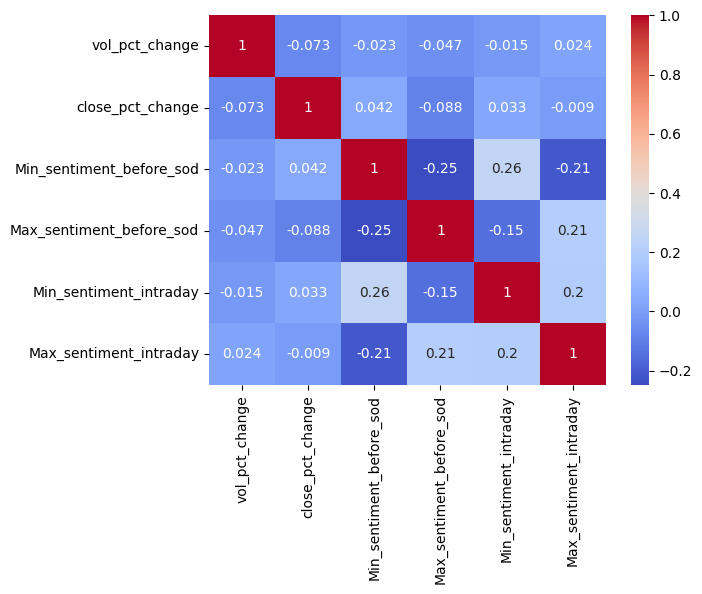

In [39]:
# Create heatmap
related_cols = ['vol_pct_change', 'close_pct_change', 'Min_sentiment_before_sod', 'Max_sentiment_before_sod', 'Min_sentiment_intraday', 'Max_sentiment_intraday']
sns.heatmap(final_df[related_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [40]:
# Define a function to apply the condition element-wise
def classify_movement(change):
    if change > 0.05:
        return 1
    elif change < -0.05:
        return -1
    else :
        return 0
# Apply the function to each value in the 'close_pct_change' column
final_df['market_movement'] = final_df['close_pct_change'].apply(classify_movement)

In [41]:
final_df['market_movement'].value_counts()

market_movement
 0    1382
-1     205
 1     156
Name: count, dtype: int64

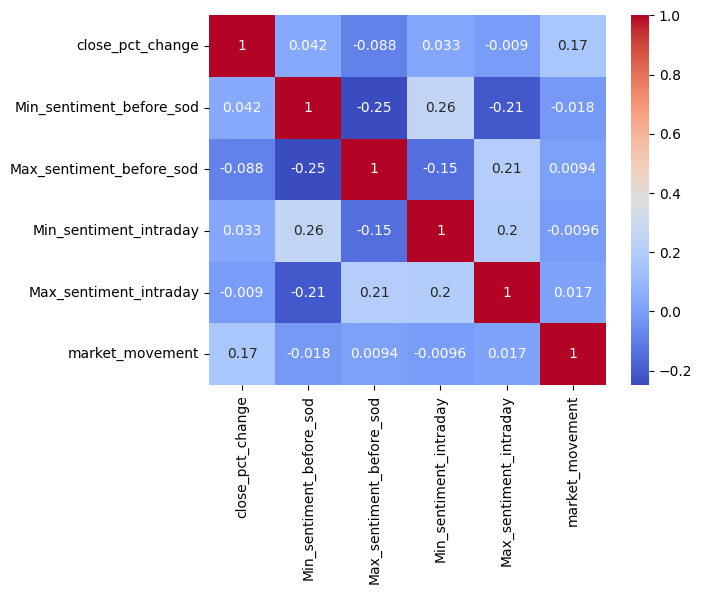

In [42]:
final_df['market_movement'].value_counts()
required_cols = ['close_pct_change', 'Min_sentiment_before_sod', 'Max_sentiment_before_sod', 'Min_sentiment_intraday', 'Max_sentiment_intraday', 'market_movement']

final_market_df = final_df[required_cols]
sns.heatmap(final_market_df[required_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing

In [43]:
# Handling missing values
final_market_df.dropna(inplace=True) 

# Resetting index
final_market_df.reset_index(drop=True, inplace=True)

In [44]:
final_market_df.to_excel(r"C:\Users\nkman\OneDrive\Desktop\output.xlsx", index=False)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming final_market_df is your DataFrame containing the required columns
# Example:
# final_market_df = pd.DataFrame({...})

# Define the required columns and the target variable
required_cols = ['close_pct_change', 'Min_sentiment_before_sod', 'Max_sentiment_before_sod', 
                 'Min_sentiment_intraday', 'Max_sentiment_intraday']
target_col = 'market_movement'

# Splitting the data into features (X) and target variable (y)
X = final_market_df[required_cols]
y = final_market_df[target_col]

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

Random forest classifier

In [46]:
# Train the classifier
rf_classifier.fit(X_train, y_train) #model training

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test) # model testing & predicting



In [48]:
y_test

482     0
1507    0
950     0
1005    0
705     0
       ..
310     0
56      0
513     0
366     0
561     0
Name: market_movement, Length: 349, dtype: int64

In [49]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  1,
        1, -1,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0, -1, -1,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0

In [50]:
X_test

,close_pct_change,Min_sentiment_before_sod,Max_sentiment_before_sod,Min_sentiment_intraday,Max_sentiment_intraday
482,0.025414,-0.7622,0.9636,-0.5423,-0.5423
1507,0.022450,-0.5267,0.8687,0.0,0.0
950,-0.032792,0.0,0.8255,0.3818,0.9509
1005,-0.003499,-0.2263,0.883,0.2714,0.4486
705,-0.048986,-0.7003,0.9148,0.4939,0.9366
...,...,...,...,...,...
310,-0.010087,-0.9136,0.5106,0.3612,0.7184
56,0.042881,-0.902,0.9642,-0.8429,0.7574
513,-0.000703,-0.8256,0.8176,-0.1027,-0.1027
366,0.005447,-0.4639,0.7096,0.0,0.0


In [51]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  1,
        1, -1,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0, -1, -1,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0

In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.997134670487106


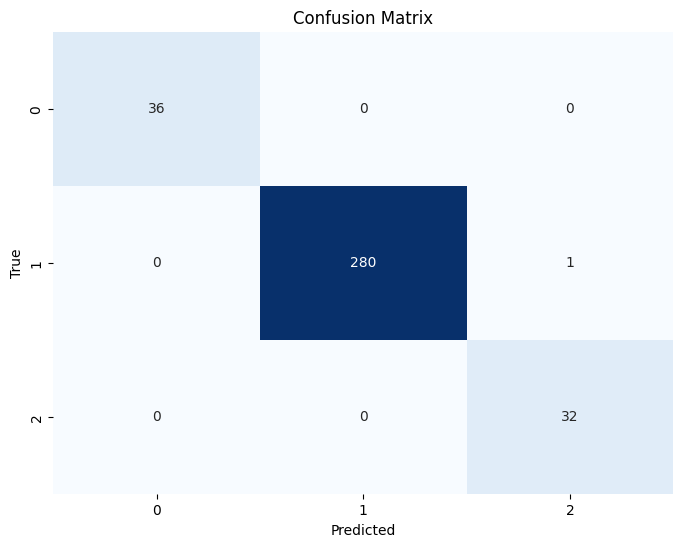

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined as in your example
# y_pred = rf_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression()

In [55]:
# Train the model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
# Predictions on the test set
y_pred_log = log_reg.predict(X_test)



In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy}")

Accuracy: 0.833810888252149


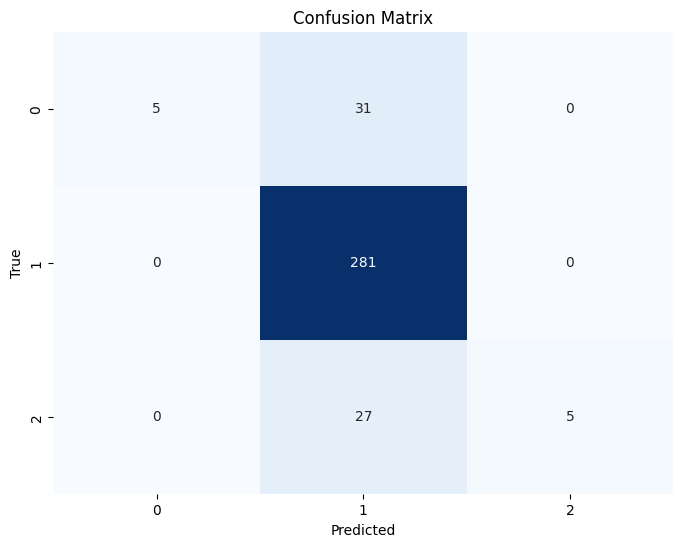

In [58]:
# Calculate confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

SVM

In [59]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [60]:
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [61]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8252148997134671


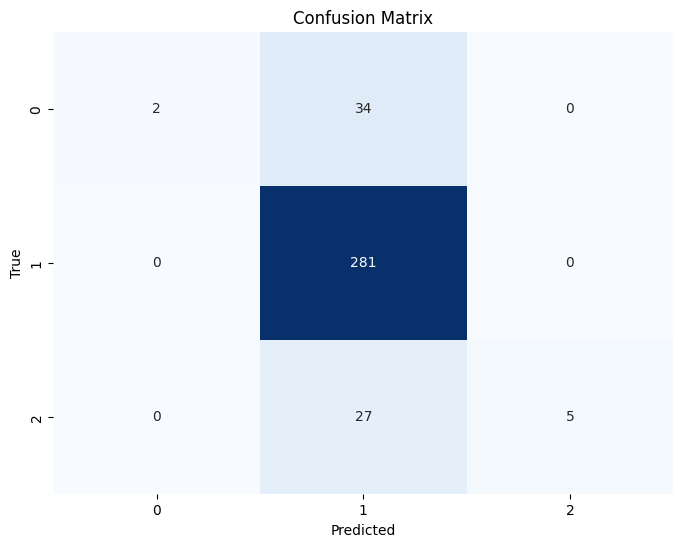

In [62]:
# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()